In [5]:
import numpy
%matplotlib nbagg
from matplotlib import pyplot
from tqdm import tqdm, tnrange

import aotools
from aotools.turbulence import infinitephasescreen_fried

In [9]:
nx_size = 128
pxl_scale = 8./nx_size # m/pixel
r0 = 0.2
L0 = 10.
stencil_length_factor = 8
n_scrns = 5000
n_tests = 10
wind_speed = 10 #m/s - just arbitrarily set
time_step = pxl_scale/wind_speed # This is timestep, as one pixel added on each iteration

print("Time Step: {} s".format(time_step))

print("Init phase screen")
phase_screen = infinitephasescreen_fried.PhaseScreen(nx_size, pxl_scale, r0, L0, stencil_length_factor=stencil_length_factor)
print("Total Stencil Size: {}m ({} pixels)".format(stencil_length_factor*phase_screen.nx_size * pxl_scale, phase_screen.stencil_length))

power_spectrum = numpy.zeros((n_tests, n_scrns))

for n in tnrange(n_tests):
    print("alloc screen buffer")
    screen_buffer = numpy.zeros((n_scrns, nx_size**2))

    for i in tnrange(n_scrns):
        phase_screen.addRow()
        screen_buffer[i] = phase_screen.scrn.flatten()

    print("Do FFT...")

    power_spectra = abs(numpy.fft.fft(screen_buffer, axis=0))**2
    power_spectrum[n] = power_spectra.mean(1)


x_vals = numpy.fft.fftfreq(n_scrns, d=time_step)
power_spectrum = power_spectrum[:, :n_scrns//2]
x_vals = x_vals[:n_scrns//2]


Time Step: 0.00625 s
Init phase screen
New size: 129
Total Stencil Size: 64.5m (1032 pixels)
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...
alloc screen buffer
Do FFT...



<IPython.core.display.Javascript object>


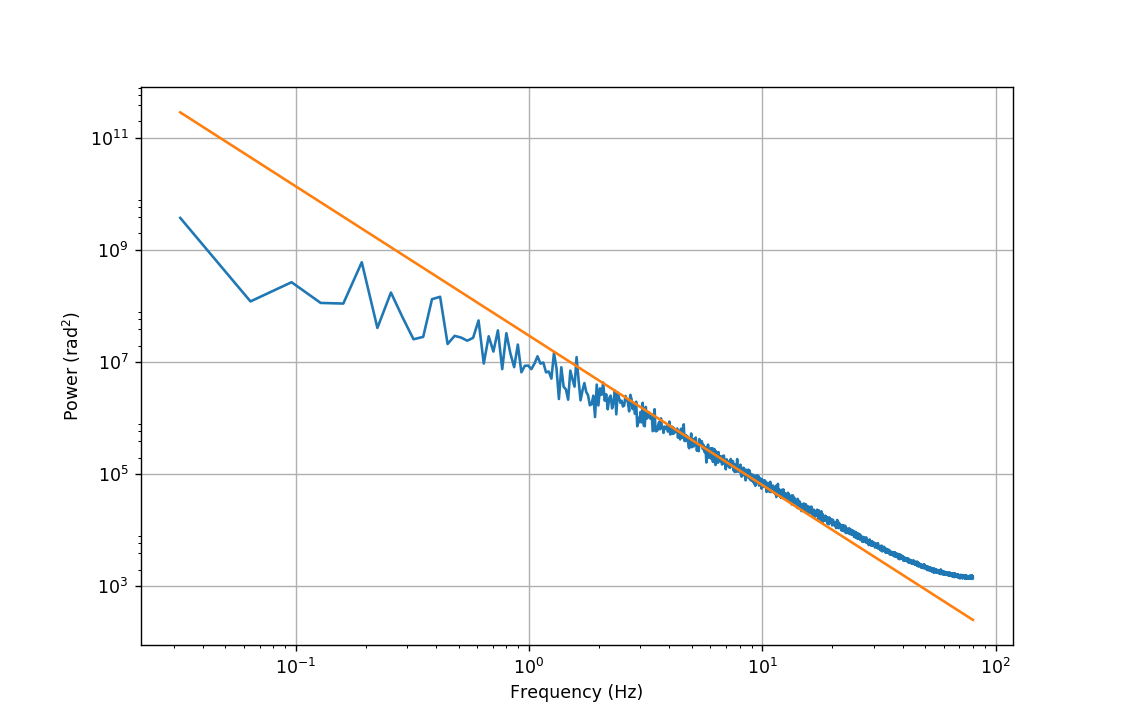

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in power


In [7]:
pyplot.figure()
pyplot.grid()
pyplot.loglog(x_vals, power_spectrum.T, alpha=0.2)
pyplot.loglog(x_vals, power_spectrum.mean(0), color="k")
pyplot.plot(x_vals, 30e6 * x_vals**(-8./3))
pyplot.xlabel("Frequency (Hz)")
pyplot.ylabel("Power ($\mathrm{rad}^2$)")